# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn-11-1-3/telco.csv


# Explore The Dataset

In [2]:
# Read Dataset
dataset = pd.read_csv('/kaggle/input/telco-customer-churn-11-1-3/telco.csv')
dataset.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [4]:
# Sum the null value on dataset
dataset.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

# Visualization

**Presentation of Customer Churn**

Text(0.5, 1.0, 'Pie Chart Customer Churn')

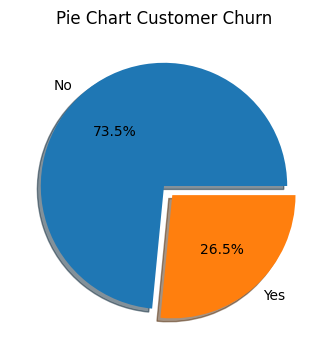

In [5]:
grouped_churn = dataset.groupby('Churn Label', as_index=False).count()

fig = plt.subplots(figsize=(8,4))
explode = (0, 0.1)
plt.pie(x=grouped_churn['Gender'], labels=grouped_churn['Churn Label'], autopct='%.1f%%', pctdistance=0.6, explode=explode, shadow=True)
plt.title('Pie Chart Customer Churn')

Explanation:
A total of 26.5% of customers have churned, meaning they stopped using the service. Meanwhile, 73.5% did not churn, indicating they are still active and loyal customers.

Analysis:
- A churn rate of 26.5% means about a quarter of the customer base has been lost. While this is not critically high, it still deserves attention.
- The majority (73.5%) of customers remain active, which is a good sign of customer satisfaction and brand trust.

Recommended actions:
- Investigate churn causes, such as service quality, pricing, customer experience, or competitive offerings.
- Identify common traits among churned customers to improve early intervention and prevention.
- Boost retention through loyalty programs, service personalization, and better customer support.

**Correlation Between Tenure in Months & Total**

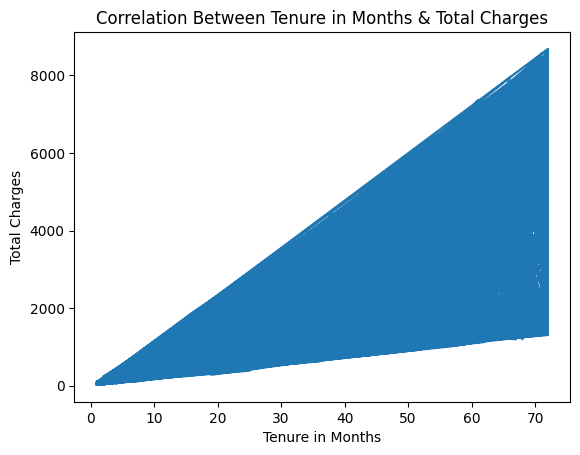

In [6]:
plt.plot(dataset['Tenure in Months'], dataset['Total Charges'])
plt.xlabel('Tenure in Months')
plt.ylabel('Total Charges')
plt.title('Correlation Between Tenure in Months & Total Charges')
plt.show()

The scatter plot shows the relationship between tenure (in months) on the X-axis and total charges on the Y-axis. A strong positive linear correlation is visible: the longer a customer stays, the more they are charged in total.

Analysis:
- The dense triangular pattern indicates that the longer the subscription period, the higher the cumulative charges. This makes sense since customers are billed monthly.
- Most data points follow a consistent trend, suggesting the company’s billing system functions properly over time.
- Some points, especially in the lower-right region, deviate from the main trend. These may represent customers with long tenures but unusually low charges — possibly due to discounts, billing errors, or periods of inactivity.
- Long-term customers generate significant revenue. Therefore, customer retention strategies are critical — the longer customers stay, the higher their lifetime value.

**Top 5 City By Churn Label**

In [7]:
# Count Top 5 City With Churn 'Yes'
top_yes = dataset[dataset['Churn Label'] == 'Yes']['City'].value_counts().nlargest(5)
print(top_yes)

# Count Top 5 City With Churn 'No'
top_no = dataset[dataset['Churn Label'] == 'No']['City'].value_counts().nlargest(5)
print(top_no)

City
San Diego        185
Los Angeles       78
San Francisco     31
San Jose          29
Sacramento        26
Name: count, dtype: int64
City
Los Angeles      215
San Diego        100
San Jose          83
Sacramento        82
San Francisco     73
Name: count, dtype: int64


In [8]:
# Combined Dataframe For Visualization
top_yes_df = top_yes.reset_index()
top_yes_df.columns = ['City', 'Count']
top_yes_df['Churn Label'] = 'Yes'

top_no_df = top_no.reset_index()
top_no_df.columns = ['City', 'Count']
top_no_df['Churn Label'] = 'No'

combined_df = pd.concat([top_yes_df, top_no_df])
combined_df


,City,Count,Churn Label
0,San Diego,185,Yes
1,Los Angeles,78,Yes
2,San Francisco,31,Yes
3,San Jose,29,Yes
4,Sacramento,26,Yes
0,Los Angeles,215,No
1,San Diego,100,No
2,San Jose,83,No
3,Sacramento,82,No
4,San Francisco,73,No


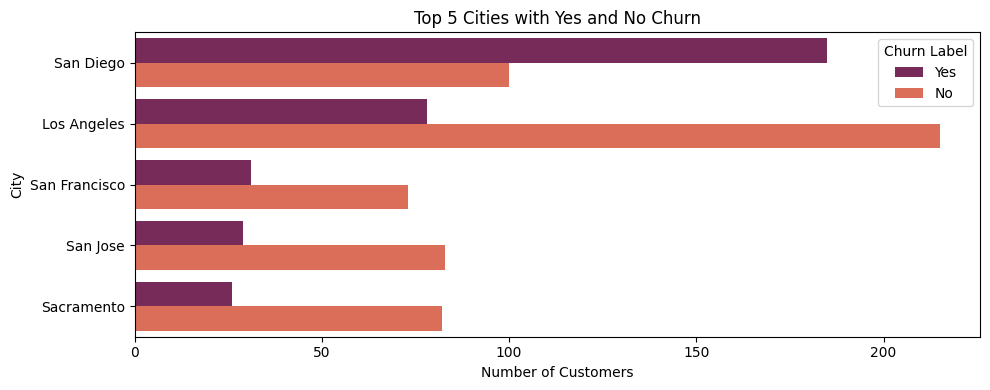

In [9]:
# Bar Plot
plt.figure(figsize=(10, 4))
sns.barplot(data=combined_df, x='Count', y='City', hue='Churn Label', palette='rocket')
plt.title('Top 5 Cities with Yes and No Churn')
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.legend(title='Churn Label')
plt.tight_layout()
plt.show()

Analysis:
- San Diego stands out with the highest churn count, suggesting potential local issues such as competitors, poor service experience, or pricing concerns.
- Los Angeles ranks high in both churn and non-churn, indicating a large and diverse customer base. There's opportunity here to improve retention through better segmentation and targeted strategies.
- San Francisco, San Jose, and Sacramento appearing in both lists implies that more granular segmentation is needed to understand the differences between churned and retained customers in these cities.

Recommended actions:
- Conduct city-specific churn analysis, especially in San Diego and Los Angeles.
- Develop geo-targeted retention strategies.
- Evaluate marketing, service delivery, and customer experience based on local customer behavior.

**Distribute of Data by Tenure Months & Churn**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


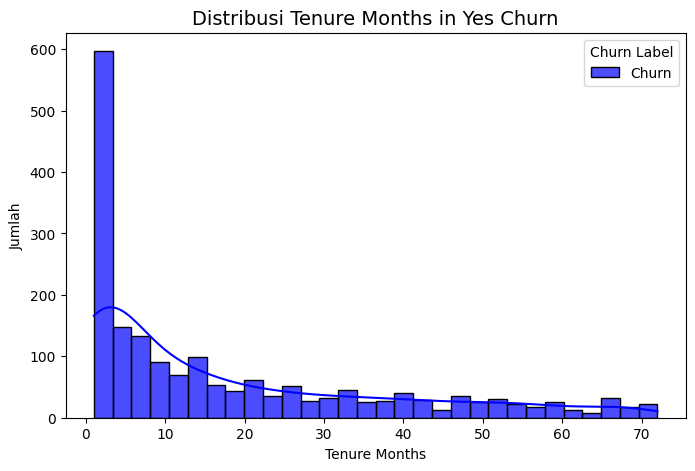

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(data=dataset[dataset['Churn Label'] == 'Yes'], x='Tenure in Months', color='blue', kde=True, label='Churn', alpha=0.7, bins=30)
plt.title('Distribusi Tenure Months in Yes Churn', fontsize=14)
plt.xlabel('Tenure Months')
plt.ylabel('Jumlah')
plt.legend(title='Churn Label')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


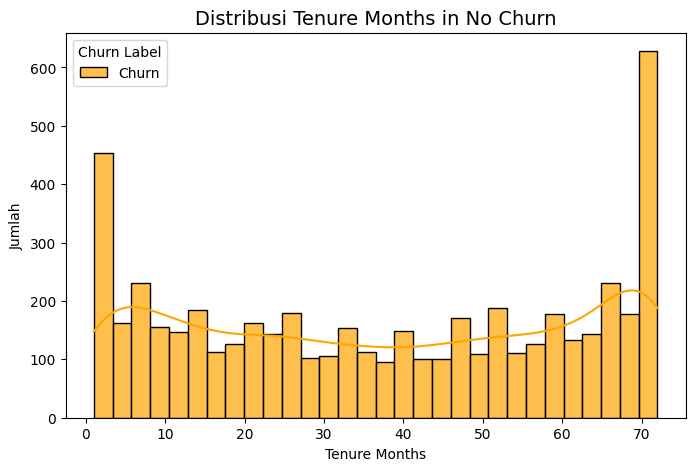

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(data=dataset[dataset['Churn Label'] == 'No'], x='Tenure in Months', color='orange', kde=True, label='Churn', alpha=0.7, bins=30)
plt.title('Distribusi Tenure Months in No Churn', fontsize=14)
plt.xlabel('Tenure Months')
plt.ylabel('Jumlah')
plt.legend(title='Churn Label')
plt.show()


Analysis:
Based on Tenure Months and Churn Label data, We can observe that customers who Churn tend to have low Tenures. On the other hand, loyal customers (higher Tenure) will generally Non-Churn. This indicates that Churn generally occurs in new customers. Further analysis is needed as to why this happens.
- Are new customers only interested in the services provided at the beginning of their subscription?
- Are new customers more selective and consider that competitors are better?

Recommendation:
- We can focus on new customers to not only provide a positive initial experience but also a long-term one.
- Provide incentives for new customers to keep them around longer, such as discounts for the first 6 months or additional service bonuses.
- Create a special retention program for customers in the middle (medium tenure).